 Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and ridge, Lasso regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('uber.csv')
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
168185,11640466,2015-04-29 10:58:04.0000006,57.54,2015-04-29 10:58:04 UTC,-73.950607,40.775002,-73.783440,40.643791,1
27174,53716451,2013-08-22 15:25:10.0000002,8.00,2013-08-22 15:25:10 UTC,-73.907706,40.774018,-73.923329,40.755048,2
120933,10469042,2013-08-05 04:08:33.0000002,14.50,2013-08-05 04:08:33 UTC,-73.981884,40.757484,-73.952960,40.807642,2
39531,37463419,2009-08-02 14:18:00.000000104,7.30,2009-08-02 14:18:00 UTC,-73.984878,40.748173,-73.985007,40.757753,1
21285,54199602,2010-11-26 21:21:00.000000168,8.10,2010-11-26 21:21:00 UTC,-73.973113,40.760658,-73.987048,40.760082,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df = df.drop(['pickup_datetime'], axis=1)
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014


In [12]:
df.isnull().sum()


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dtype: int64

In [13]:
df = df.dropna()
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]
df.shape


(199269, 10)

<Axes: ylabel='fare_amount'>

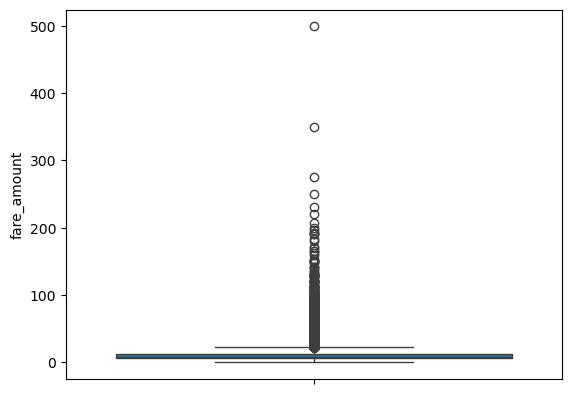

In [14]:
sns.boxplot(df['fare_amount'])


In [15]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare_amount'] > lower_bound) & (df['fare_amount'] < upper_bound)]
df.shape


(182148, 10)

In [16]:
corr = df.corr()
corr


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year
fare_amount,1.000000,0.000125,0.002826,-0.002534,0.000715,0.011995,-0.013304,0.007128,0.026188,0.135630
pickup_longitude,0.000125,1.000000,-0.811435,0.835878,-0.850520,-0.000582,0.003668,0.003436,-0.003842,0.009803
pickup_latitude,0.002826,-0.811435,1.000000,-0.766797,0.683972,-0.001742,-0.004779,-0.006933,0.004069,-0.009843
dropoff_longitude,-0.002534,0.835878,-0.766797,1.000000,-0.913666,0.000271,0.004220,0.003941,-0.003292,0.007351
dropoff_latitude,0.000715,-0.850520,0.683972,-0.913666,1.000000,-0.000911,-0.003373,-0.006237,0.003317,-0.009972
passenger_count,0.011995,-0.000582,-0.001742,0.000271,-0.000911,1.000000,0.013306,0.003378,0.009190,0.001532
hour,-0.013304,0.003668,-0.004779,0.004220,-0.003373,0.013306,1.000000,0.005250,-0.002835,0.003174
day,0.007128,0.003436,-0.006933,0.003941,-0.006237,0.003378,0.005250,1.000000,-0.016419,-0.010496
month,0.026188,-0.003842,0.004069,-0.003292,0.003317,0.009190,-0.002835,-0.016419,1.000000,-0.115607
year,0.135630,0.009803,-0.009843,0.007351,-0.009972,0.001532,0.003174,-0.010496,-0.115607,1.000000


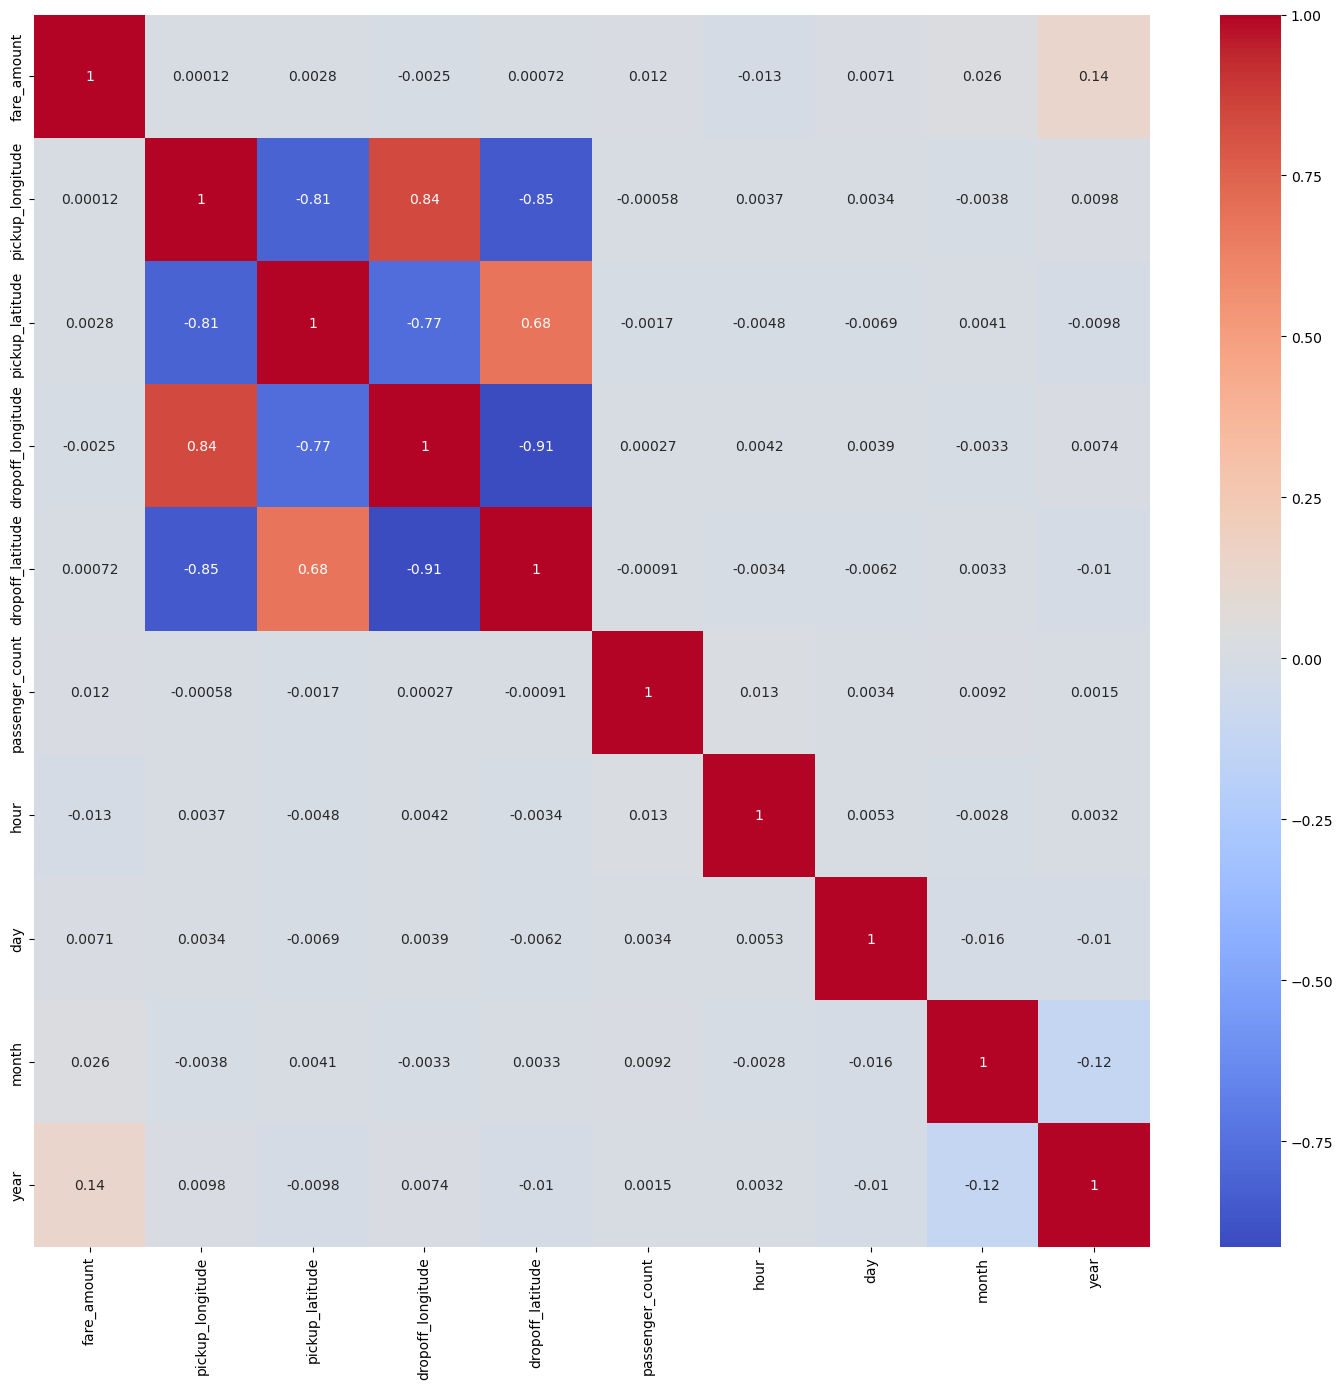

In [17]:
plt.figure(figsize=(18,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [25]:
lr = LinearRegression()
rig = Ridge()
lass = Lasso()

x = df.drop(['passenger_count'], axis=1)
y = df['passenger_count']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=32, test_size=0.2)

lr.fit(x_train, y_train)
rig.fit(x_train, y_train)
lass.fit(x_train, y_train)


Lasso()

In [26]:
y_pred = lr.predict(x_test)
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

y_pred = rig.predict(x_test)
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

y_pred = lass.predict(x_test)
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Linear Regression:
R²: 0.0006000637154700561
RMSE: 1.3013869504918585

Ridge Regression:
R²: 0.0006000643961555641
RMSE: 1.301386950048675

Lasso Regression:
R²: -5.340509565687768e-06
RMSE: 1.3017810599218966


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
